In [10]:
using PyPlot
using LinearAlgebra
using FFTW
# using Interpolations

In [11]:
Nt = 201;
dt = 1/200;
t = range(0, length=Nt, step=dt);

In [12]:
function gauss_func(t, b, c)
    y = exp.(-(t.-b).^2 ./ (2*c^2));
    return y./maximum(y)
end

function sin_func(t, omega, phi)
    return sin.(2*pi*omega*(t .- phi));
end

function ricker_func(t, t0, sigma)
    t = t.-t0;
    f = (1 .- t.^2 ./ sigma.^2) .* exp.(- t.^2 ./ (2 .* sigma.^2));
    return f
end

ricker_func (generic function with 1 method)

In [13]:
function w2_metric(f,g,t,Nt,dt)
    f = f ./ norm(f, 1)
    g = g ./ norm(g, 1)
    F = zeros(Nt);
    G = zeros(Nt);
    for i = 1:Nt
        F[i] = sum(f[1:i])
        G[i] = sum(g[1:i])
    end
    w2 = 0;
    for ind = 1:Nt
        ind_g = findall(x -> x >= F[ind], G)
        if length(ind_g) == 0
            w2 += (t[end] - t[ind])^2 * f[ind]
        else
            w2 += (t[ind_g[1]] - t[ind])^2 * f[ind]
        end
    end
    return w2
end
function wasserstein_1d(f, g)
    F = zeros(Nt); G = zeros(Nt);
    G_inv_F = zeros(Nt);
    for i = 1:Nt
        F[i] = sum(f[1:i]);
        G[i] = sum(g[1:i]);
    end
    p = 1;
    w = sum(abs.((F-G).^p)).^(1/p)
    return w
end


wasserstein_1d (generic function with 1 method)

In [14]:
function ft_w2(f,g,t,Nt,dt)
    f_fft = fft(f)
    energy_f = abs.(f).^2
    phase_f = angle.(f_fft) .+ pi
    g_fft = fft(g)
    energy_g = abs.(g).^2
    phase_g = angle.(g_fft) .+ pi
    
    fre = range(0,stop=2*pi,length=Nt)
    d_fre = fre[2]-fre[1]
#     energy_norm = w2_metric(energy_f,energy_g,fre,Nt,d_fre)
#     phase_norm = w2_metric(phase_f,phase_g,fre,Nt,d_fre)
    energy_norm = wasserstein_1d(energy_f, energy_g)
    phase_norm = wasserstein_1d(phase_f, phase_g)
    
    ratio = 100;
    w2 = energy_norm + ratio * phase_norm
    return w2
end


ft_w2 (generic function with 1 method)

In [20]:
f = gauss_func(t, 1.1, 0.1);
g = gauss_func(t, 1, 0.1);
f = f ./ norm(f,1);
g = g ./ norm(g,1);
ft_w2(f,g,t,Nt,dt)
wasserstein_1d(f,g)

5.534599718561775

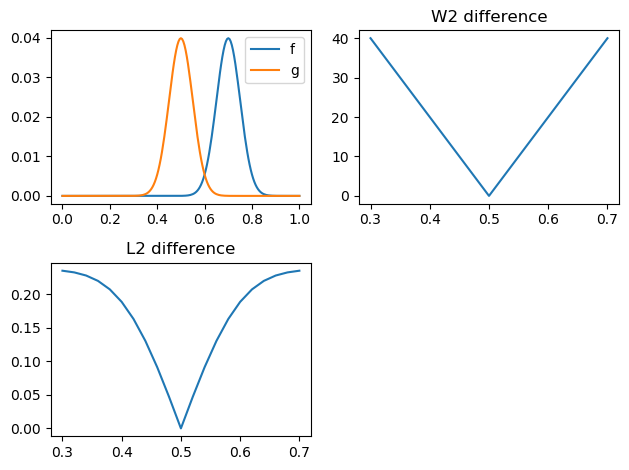

In [21]:
g = gauss_func(t, 0.5, 0.05);
g = g ./ norm(g,1);

misfit = 0.3:0.02:0.7
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = gauss_func(t, misfit[i], 0.05)
    f = f ./ norm(f,1)
    w2_diff[i] = ft_w2(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()


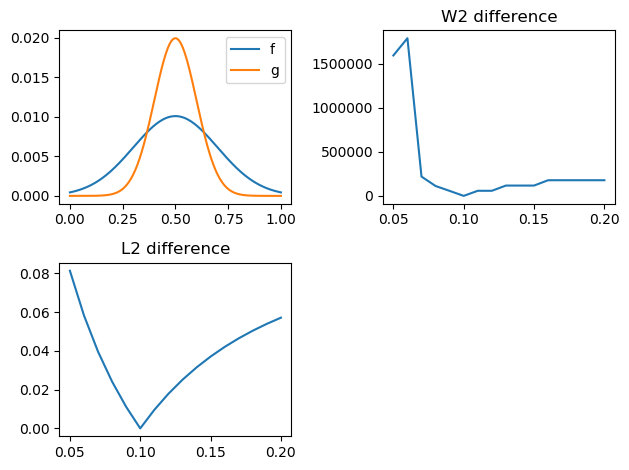

In [19]:
g = gauss_func(t, 0.5, 0.1);
g = g ./ norm(g,1);

misfit = 0.05:0.01:0.2
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = gauss_func(t, 0.5, misfit[i])
    f = f ./ norm(f,1)
    w2_diff[i] = ft_w2(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()




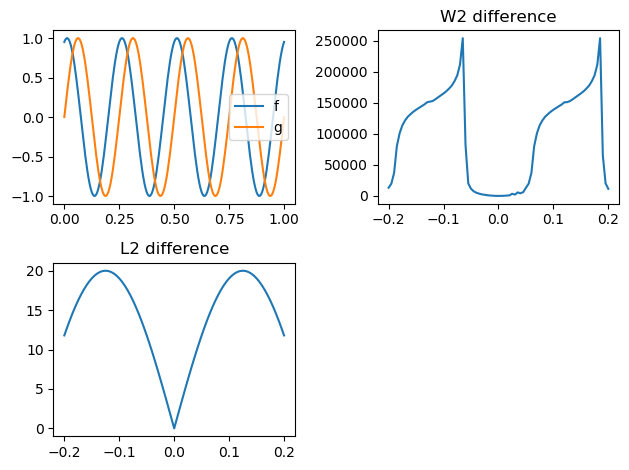

In [47]:
g = sin_func(t, 4, 0);

misfit = -0.2:0.005:0.2
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = sin_func(t, 4, misfit[i]);
    
    w2_diff[i] = ft_w2(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()

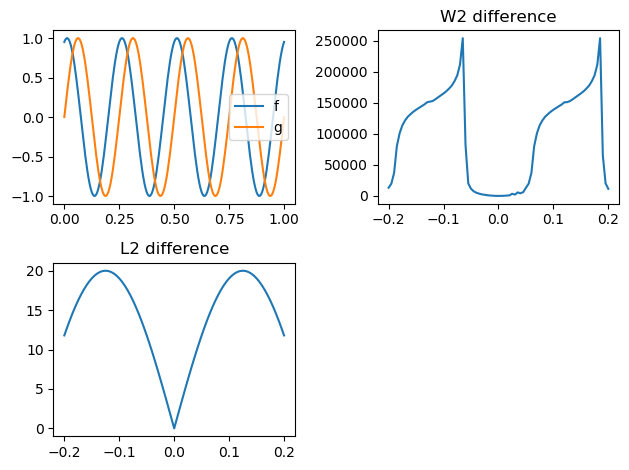

In [48]:
g = sin_func(t, 4, 0);

misfit = -0.2:0.005:0.2
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = sin_func(t, 4, misfit[i]);
    w2_diff[i] = ft_w2(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()

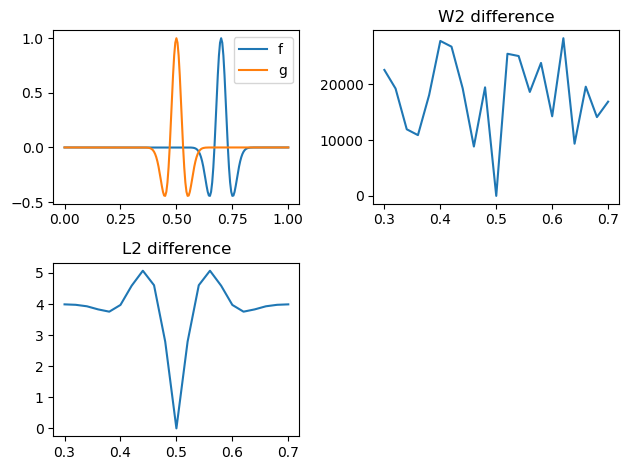

In [49]:
g = ricker_func(t, 0.5, 0.03);

misfit = 0.3:0.02:0.7
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = ricker_func(t, misfit[i], 0.03);
    w2_diff[i] = ft_w2(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()

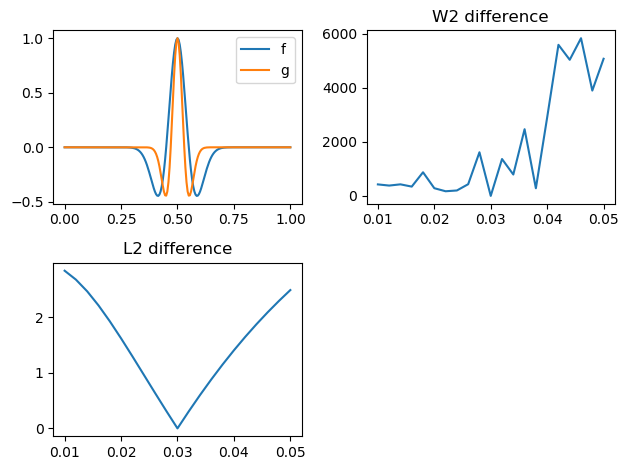

In [51]:
g = ricker_func(t, 0.5, 0.03);
misfit = 0.01:0.002:0.05
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = ricker_func(t, 0.5, misfit[i]);
    w2_diff[i] = ft_w2(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()